# CS5132 PA2: Breast Cancer Prediction using Trees

### By Jed, Matthew, Mayukh and Zayan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Acquisition

The dataset used was the Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Machine Learning Repository. 

In [2]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


The dataset contained 569 instances, with no missing data. 

## Data Processing

As per the reference paper ‘Fuzzy method for pre-diagnosis of breast cancer from the Fine Needle Aspirate analysis’, we added newly generated features of ‘homogeneity’ and ‘uniformity’ that were demonstrated to have diagnostic importance. 

‘Homogeneity’ was the difference between the extreme value of symmetry and the mean value of symmetry. ‘Homogeneity’ was an indication of the symmetry of the cell nuclei. 

‘Uniformity’ was the difference between the radius extreme value and the radius mean value, ‘Uniformity’ was an indication of the variability in size of the cell nuclei. 

In [3]:
df['homogeneity'] = df['symmetry_worst'] - df['symmetry_mean']

In [4]:
df['uniformity'] = df['radius_worst'] - df['radius_mean']

As per the reference paper, the features of ‘area’, ‘perimeter’, ‘homogeneity’ and ‘uniformity’ produced the best results. Thus, our method used these 4 features. All other features were dropped.

In [5]:
df = df[['id', 'diagnosis', 'area_worst', 'perimeter_worst', 'homogeneity', 'uniformity']]

In [6]:
df

,id,diagnosis,area_worst,perimeter_worst,homogeneity,uniformity
0,842302,M,2019.0,184.60,0.2182,7.390
1,842517,M,1956.0,158.80,0.0938,4.420
2,84300903,M,1709.0,152.50,0.1544,3.880
3,84348301,M,567.7,98.87,0.4041,3.490
4,84358402,M,1575.0,152.20,0.0555,2.250
...,...,...,...,...,...,...
564,926424,M,2027.0,166.10,0.0334,3.890
565,926682,M,1731.0,155.00,0.0820,3.560
566,926954,M,1124.0,126.70,0.0628,2.380
567,927241,M,1821.0,184.60,0.1690,5.140


## Data Visualisation

In [7]:
df.describe()

,id,area_worst,perimeter_worst,homogeneity,uniformity
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,880.583128,107.261213,0.108914,2.141898
std,1.250206e+08,569.356993,33.602542,0.046960,1.658808
min,8.670000e+03,185.200000,50.410000,0.000000,0.000000
25%,8.692180e+05,515.300000,84.110000,0.079700,1.040000
50%,9.060240e+05,686.500000,97.660000,0.100400,1.520000
75%,8.813129e+06,1084.000000,125.400000,0.128400,2.770000
max,9.113205e+08,4254.000000,251.200000,0.404100,11.760000


In [8]:
pd.value_counts(df['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

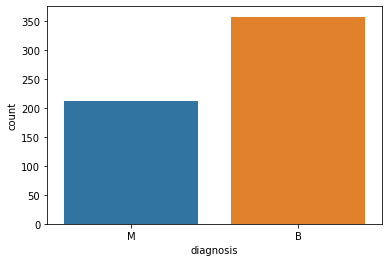

In [9]:
sns.countplot(x=df['diagnosis'])

212 instances were malignant (cancerous) and  357 instances were benign (not cancerous).

## Export of Dataframe to CSV

In [10]:
df.to_csv('breast_cancer.csv', float_format='%.4f')